# Part I - Ford GoBike System Data Exploration.
--- 
### By Benjamin Adekunle Ojo

## Introduction
---
For the past few years a form of economics and social movement have developed amounge developing and developed economy, this form of economy is know as the Gig Economy for which a quote best define as 'You will Owe Nothing and You'll be Happy' in this system everything is shared by everyone, service is rended to individual as you need them instead of buying the projuct outright. As this form of economy is developing a social movement was also on the rise, a movement that emphase reducing carbon emmission by using bike and other carbon neutral form of transportation. 

The Ford GoBike System is one of the businesses that rose up to meet this demand, providing bike sharing services to individuals in urban areas. The dataset was provided by Ford Gobike System and it contains activities of customers who made use of Ford GoBike System from 2017 to 2019. The following are features contain in the Dataset: 

### Ford GoBike Dataset Features:
 * `bike_id`: Unique string for every bike owed by Ford GoBike.
 
 * `duration_sec`: The duration in seconds for each trip.
 
 * `start_time`: The time a user started his or her trip.
 
 * `end_time`: The time a user ended his or her trip.
 
 * `start_station_id`: A unique string for each starting station maintained by ford GoBike.
 
 * `start_station_name`: Starting Station name.
 
 * `start_station_latitude`: Starting station latitude Location of station.
 
 * `start_station_longitude`: Starting longitude location of station.
 
 * `end_station_id`: A unique string for each ending station maintained by ford GoBike.
 
 * `end_station_name`: End station name.
 
 * `end_station_latitude`: End station latitude Location of station.
 
 * `end_station_longitude`: End station longitude location of station. 
 
 * `user_type`: Is the user a customer or subscriber. 
 
 * `member_birth_year`: Year user created or use a ford Goford account.
 
 * `member_gender`: Is the user a Male or Famale.
 
 * `bike_share_for_all_trip`: This is a discounted memberships for low-income riders. 

The aim of this project is to create a series of explorative and explanatory visualization using the Ford GoBike System dataset. This notebook deals with the explorative section of the project, but before commencing with our visaulization we first have to perform preliminary data wrangling. 

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Gerthering Data 

In [2]:
# Loading dataset into Pandas Dataframe
gobike_data = pd.read_csv('data/fordgobike.csv')

In [3]:
# Brief Highlight of Dataset
gobike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Data Assessment 

In [4]:
# Sample highlight of data.
gobike_data.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
26284,1017,2019-02-25 12:48:03.4470,2019-02-25 13:05:00.8810,350.0,8th St at Brannan St,37.771431,-122.405787,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,5250,Customer,1994.0,Female,No
84523,1182,2019-02-17 17:11:26.5170,2019-02-17 17:31:09.0490,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,70.0,Central Ave at Fell St,37.773311,-122.444293,6087,Subscriber,1988.0,Female,No
60879,308,2019-02-20 18:12:51.1760,2019-02-20 18:17:59.5000,258.0,University Ave at Oxford St,37.872355,-122.266447,251.0,California St at University Ave,37.870555,-122.279720,997,Subscriber,1975.0,Male,No
152215,183,2019-02-06 16:19:25.1510,2019-02-06 16:22:28.9770,27.0,Beale St at Harrison St,37.788059,-122.391865,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,4838,Subscriber,1969.0,Male,No
8122,204,2019-02-28 08:39:55.4890,2019-02-28 08:43:19.9470,215.0,34th St at Telegraph Ave,37.822547,-122.266318,176.0,MacArthur BART Station,37.828410,-122.266315,5678,Subscriber,1995.0,Female,No
4544,1127,2019-02-28 15:28:22.4350,2019-02-28 15:47:09.5090,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,118.0,Eureka Valley Recreation Center,37.759177,-122.436943,4372,Subscriber,1984.0,Male,Yes
6032,326,2019-02-28 11:26:32.8810,2019-02-28 11:31:59.5760,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,16.0,Steuart St at Market St,37.794130,-122.394430,4370,Subscriber,1980.0,Male,No
131417,489,2019-02-09 12:52:30.7600,2019-02-09 13:00:40.3720,72.0,Page St at Scott St,37.772406,-122.435650,96.0,Dolores St at 15th St,37.766210,-122.426614,2016,Subscriber,1984.0,Male,No
32173,260,2019-02-24 15:02:56.7480,2019-02-24 15:07:17.3920,66.0,3rd St at Townsend St,37.778742,-122.392741,27.0,Beale St at Harrison St,37.788059,-122.391865,5377,Subscriber,1942.0,Male,No
21982,1224,2019-02-26 08:27:34.0650,2019-02-26 08:47:58.9230,377.0,Fell St at Stanyan St,37.771917,-122.453704,19.0,Post St at Kearny St,37.788975,-122.403452,6568,Subscriber,NaN,NaN,No


In [5]:
# Columns 
gobike_data.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
# Print the data shape.
print(f"This Ford GoBike dataset has {gobike_data.shape[0]} lines and {gobike_data.shape[1]} columns", "\n\n")

# Viewing the data structure. 
gobike_data.info()

This Ford GoBike dataset has 183412 lines and 16 columns 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13 

In [7]:
# Check for presence of Null values
print('Are there any Null values in each feature.', '\n')
print( gobike_data.isna().any(), '\n\n') 

# Number of Null values per features
print('The number of Null values per features', '\n')
print(f'{gobike_data.isna().sum()}')

Are there any Null values in each feature. 

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool 


The number of Null values per features 

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id            

In [8]:
# Statistical value of each feature
gobike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
# Checking for dupliacate values
print(f'There are {gobike_data.duplicated().sum()} duplicates in our data')

There are 0 duplicates in our data


In [10]:
# Viewing the unique values of each column 

# Storing all the column title in a list
col = gobike_data.columns

# Using a for loop to check for the number of unique value 
# in each column and anyone greater than 20 will be remove. 

for i in range(len(col)): 
    column = col[i]
    num_uni = gobike_data[column].nunique()
    if num_uni > 20: 
        continue 
    else: 
        print("\n", f"The following are variables that makes up the {column} feature.")
        print('\t', gobike_data[column].unique())


 The following are variables that makes up the user_type feature.
	 ['Customer' 'Subscriber']

 The following are variables that makes up the member_gender feature.
	 ['Male' nan 'Other' 'Female']

 The following are variables that makes up the bike_share_for_all_trip feature.
	 ['No' 'Yes']


#### Observation from assessment: 
1. Drop Null values present in the data set. 


2. Convert feature data type that are incorrect. 
    * Converting `start_station_id`, `end_station_id`, and `bike_id` from float/int to str.
    
    * Converting `user_type`, and `member_gender` from object to categorical dtype.
    
    * Converting `start_time`, `member_birth_year`, and `end_time` to datetime.
    
    * Converting `bike_share_for_all_trip` from object to bool.
    
    
3. Drop columns that aren't useful to our analysis.


4. Converting the duration_sec column from second to minute. 

### Data Cleaning

In [11]:
# Making a copy of the data. 
gobike_copy = gobike_data.copy()

# Viewing the copy dataset. 
gobike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### `Issue #1`: Drop Null values present in the dataset. 

##### Define:  `
 * Using the dropna() function we will be removing null values present in our dataset 

##### Code:

In [12]:
# Viewing the null values present in each column. 
gobike_copy.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [13]:
# Using dropna function to drop null values. 
gobike_copy = gobike_copy.dropna()

gobike_copy

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


##### Test 

In [14]:
# Checking for the present of Null values. 
gobike_copy.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### `Issue #2`: Converting Incorrect data structures.

##### Define #1: Converting `start_station_id`, `end_station_id`, and `bike_id` from float/int to str.
    * Using astype() function we will be converting the various id features from float/int to str. 

##### Code: 


In [15]:
# viewing the data structure of the dataset. 
gobike_copy[['start_station_id', 'bike_id', 'end_station_id']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_station_id  174952 non-null  float64
 1   bike_id           174952 non-null  int64  
 2   end_station_id    174952 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 5.3 MB


In [16]:
# List of columns 
id_col = ['start_station_id', 'bike_id', 'end_station_id']

# Defining a data type converter function

def dtype_converter(data, column, dtype, cat_list= None, cat_order= False): 
    """
    This Fuction convert data from one type to another, and the following 
    arguments help in achiving this are: 
    data --> The name of the dataset.
    columns --> A list of columns that you will like to convert.
    dtype --> The data type you will like to convert you data to. 
    cat_list --> This is most useful for converting categorical variable data
    cat_order --> This is also used by for categorical variables and it to know whether
                    the feature is a order or discret data type. 
    """
 
    if dtype == 'float': 
        return data[column].astype(float)
                    
    elif dtype == 'str': 
        return data[column].astype(str)
        
    elif dtype == 'int': 
        return data[column].astype(int)
                   
    elif dtype == 'categorical': 
        vclass = pd.api.types.CategoricalDtype(ordered = cat_order, categories = cat_list)
            
        return data[column].astype(vclass)
    
    elif dtype == 'datetime': 
        return pd.to_datetime(data[column])
        

In [17]:
# Converting i.d features to string. 
gobike_copy['start_station_id'] = dtype_converter(data = gobike_copy, column = 'start_station_id' , dtype = 'str')
gobike_copy['bike_id'] = dtype_converter(data = gobike_copy, column = 'bike_id' , dtype = 'str')
gobike_copy['end_station_id'] = dtype_converter(data = gobike_copy, column = 'end_station_id' , dtype = 'str')

# view data structure. 
gobike_copy[id_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   start_station_id  174952 non-null  object
 1   bike_id           174952 non-null  object
 2   end_station_id    174952 non-null  object
dtypes: object(3)
memory usage: 5.3+ MB


##### Test 

In [18]:
# Checking the changes made
gobike_copy[['start_station_id', 'bike_id', 'end_station_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   start_station_id  174952 non-null  object
 1   bike_id           174952 non-null  object
 2   end_station_id    174952 non-null  object
dtypes: object(3)
memory usage: 5.3+ MB


##### Define #2:   Converting user_type, and member_gender from object to categorical dtype.
    
    * Converting the user type and gender features to categorical dytype.

##### Code: 


In [19]:
# viewing the data type. 
gobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  object 
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  object 
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  object 
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [20]:
# Gender column values. 
gender = gobike_copy.member_gender.value_counts().index.to_list()

# Conveting the member_gender column to categorical data type. 
gobike_copy['member_gender'] = dtype_converter(data=gobike_copy, column= 'member_gender', dtype = 'categorical', cat_list = gender)


In [21]:
# user type column values. 
utype = gobike_copy.user_type.value_counts().index.to_list()

# Converting the user type column to a categorical data type. 
gobike_copy['user_type'] = dtype_converter(data=gobike_copy, column= 'user_type', dtype = 'categorical', cat_list = utype)


##### Test 

In [22]:
gobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             174952 non-null  int64   
 1   start_time               174952 non-null  object  
 2   end_time                 174952 non-null  object  
 3   start_station_id         174952 non-null  object  
 4   start_station_name       174952 non-null  object  
 5   start_station_latitude   174952 non-null  float64 
 6   start_station_longitude  174952 non-null  float64 
 7   end_station_id           174952 non-null  object  
 8   end_station_name         174952 non-null  object  
 9   end_station_latitude     174952 non-null  float64 
 10  end_station_longitude    174952 non-null  float64 
 11  bike_id                  174952 non-null  object  
 12  user_type                174952 non-null  category
 13  member_birth_year        174952 non-null  fl

In [23]:
# Checking the changes made. 
gobike_copy[['user_type', 'member_gender']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   user_type      174952 non-null  category
 1   member_gender  174952 non-null  category
dtypes: category(2)
memory usage: 1.7 MB


#####  Define #3: Converting start_time, member_birth_year, and end_time to datetime.

    * Using the pandas to_datatime() I would be converting timed data to the datatime data formate.

##### Code: 

In [24]:
# convert start time and end time to datetime
dates = ['start_time', 'end_time']

for column in dates:
    gobike_copy[column] = dtype_converter(data = gobike_copy, column = column, dtype = 'datetime')

##### Test 

In [25]:
# Checking to see changes.
gobike_copy[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  174952 non-null  datetime64[ns]
 1   end_time    174952 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.0 MB


##### Define #4: Converting bike_share_for_all_trip from object to bool.
   * I would be converting the bike_share from string to bool

##### Code: 

In [26]:
# Bike share value count
gobike_copy.bike_share_for_all_trip.value_counts().index

# Define a bool converter function

def bool_converter(x): 
    if x == 'No':
        return False
    elif x == 'Yes': 
        return True

In [27]:
# converting to bool 
gobike_copy['bike_share_for_all_trip'] = gobike_copy['bike_share_for_all_trip'].apply(bool_converter)

##### Test: 

In [28]:
# confirming changes made to the dataset 
gobike_copy.bike_share_for_all_trip.value_counts()

False    157606
True      17346
Name: bike_share_for_all_trip, dtype: int64

In [29]:
# Confirming data type
gobike_copy.bike_share_for_all_trip.info()

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: bike_share_for_all_trip
Non-Null Count   Dtype
--------------   -----
174952 non-null  bool 
dtypes: bool(1)
memory usage: 1.5 MB


#### `Issue #3`: Converting the duration_sec column from second to minute.

##### Define: 
   * I would be creating a new column where the duration on trip is in minute. 

#### Code: 

In [30]:
# Brief view of data 
gobike_copy.duration_sec.head()

0    52185
2    61854
3    36490
4     1585
5     1793
Name: duration_sec, dtype: int64

In [31]:
# Creating a minute duration column 
gobike_copy['duration_min'] = gobike_copy['duration_sec']/60

##### Test:

In [32]:
# Confirming the changes made to the data set. 
gobike_copy.duration_min.head()

0     869.750000
2    1030.900000
3     608.166667
4      26.416667
5      29.883333
Name: duration_min, dtype: float64

#### `Issue #4`: Drop columns that aren't useful to our analysis.

##### Define: 
   * We would be dropping columns that aren't necessary for our analysis. 

##### Code: 

In [33]:
# Viewing data columns. 
gobike_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_min'],
      dtype='object')

In [34]:
# Dropping columns not need for analysis. 
gobike_copy.drop(columns = ['start_station_latitude','start_station_longitude',
                            'end_station_latitude', 'end_station_longitude'],axis= 1, inplace= True)

##### Test: 

In [35]:
# Checking to see changes has an effect. 
gobike_copy.columns 

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'duration_min'],
      dtype='object')

#### Clean Dataset. 


In [36]:
print(f"After cleaning the data, the dataset now has {gobike_copy.shape[0]} lines and {gobike_copy.shape[1]} columns", "\n")

# Viewing data structure
gobike_copy.info()

After cleaning the data, the dataset now has 174952 lines and 13 columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  category      
 11  bik

### Extract Cleaned Dataset. 

In [37]:
# Exporting cleaned dataset 
gobike_copy.to_csv(r'data/fordgobike_master_dataset',index=False)

## Data structru

### What is the structure of your dataset?
The cleaned Ford GoBike dataset has 174952 rows and 12 columns. The dataset is made
up of the following columns: 
 * `bike_id (str)`: Unique string for every bike owed by Ford GoBike.
 
 * `duration_min (float)`: The duration in seconds for each trip.
 
 * `start_time (datatime)`: The time a user started his or her trip.
 
 * `end_time (datetime)`: The time a user ended his or her trip.
 
 * `start_station_id (str)`: A unique string for each starting station maintained by ford GoBike.
 
 * `start_station_name (str)`: Starting Station name.
 
 * `end_station_id (str)`: A unique string for each ending station maintained by ford GoBike.
 
 * `end_station_name (str)`: End station name.
 
 * `user_type (categorical)`: Is the user a customer or subscriber. 
 
 * `member_birth_year (int)`: Year user created or use a ford Goford account.
 
 * `member_gender (categorical)`: Is the user a Male or Famale.
 
 * `bike_share_for_all_trip (bool)`: This is a discounted memberships for low-income riders.

### What is/are the main feature(s) of interest in your dataset?

For this dataset, the feature that we are most interested in is the duration of trip,
and what features that can influence this feature from our dataset. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Our analysis we try to look at what facts or featurs that can influnence trip duration, and from our investication of our dataset I believe that the following feature will assist us in analysis this behavour: 
* Duration of trip.
* start_time and end_time of trip. 
* start and end startion name. 
* User type and gender. 
* is the user a bike share for all trip memeber.
* bike_id to know whether some bike has more user than others (to know the condition of each bike)

Also, we would like to know what time of the week and day that each station are most active and their repective station names. for this we will be using: 
* start_station_id and end_station_id (to know station that are the most use).
* start and end time of trip (some feature enginnering will be done on the dataset). 

## Loading Cleaned dataset.

In [38]:
# Loading and viewing dataset. 
gobike = gobike_copy
print(gobike.columns, '\n')

# view 
gobike.info()

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'duration_min'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  obje

In [39]:
# In other to make our analysis smooth and easy to understand i will be adding 
# the following features to my dataset. 

# Creating a week_day feature from start_time column. 
gobike['week_day'] = gobike['start_time'].dt.day_name()
week_day = gobike['week_day'].value_counts().index.to_list()

# convert the data type from object to convert 
gobike['week_day'] = dtype_converter(data = gobike, column = 'week_day',dtype= 'categorical', cat_list = week_day)

# Creating hour column 
gobike['hours'] = gobike['start_time'].dt.hour
hours = gobike['hours'].value_counts().index.to_list()
hours = list(np.arange(len(hours)))

# convert the data type from int to categorical data type. 
gobike['hours'] = dtype_converter(data = gobike, column = 'hours', cat_list = hours, 
                                  dtype = 'categorical', cat_order = True)

# Creating the age column
gobike['age'] = 2019 - gobike['member_birth_year']
gobike['age'] = dtype_converter(data = gobike, column = 'age',dtype = 'int')

# converting the member birth year to int. 
gobike['member_birth_year'] = dtype_converter(data = gobike, column = 'member_birth_year', dtype = 'int')

In [40]:
# Data structure 
print(gobike.info(), '\n\n' )

# Columns 
print(gobike.columns, '\n\n')

# Summary of data
gobike.head(1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  int32         
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  174952 non-null  bool          
 12  duration_min    

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,week_day,hours,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,False,869.75,Thursday,17,35


## Univariate Exploration

 This section of the notebook we will be examining the distribution of univariate graph. The point of this univariable visualization is to see the distribution of individual features, in other to identify outliers, and how different variables make up a qualitative feature. 
 
 
For the sack of understanding for my readers, I would be dividing this section base on the type of data we are I plotting, and these distribution are: 

* `Qualitative Feature`: This include featurs like member_gender, user_type, etc. 

* `Quatitative Feature`: These are made up of feature such as duration_min, hours, age etc. 

### Qualitative Feature: Univariate

#### Univariate `#1` 

##### Question: 

> **What is the top 10 most common starting stations?**

##### Visualization: 

In [41]:
# Get the start station count. 
start_sta = gobike.start_station_name.value_counts()

start_sta_index = start_sta.index

print(start_sta_index)

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Howard St at Beale St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)',
       ...
       '23rd Ave at Foothill Blvd', 'Backesto Park (Jackson St at 13th St)',
       'Leavenworth St at Broadway', 'Taylor St at 9th St',
       'Willow St at Vine St', 'Farnam St at Fruitvale Ave',
       'Parker Ave at McAllister St', '21st Ave at International Blvd',
       'Palm St at Willow St', '16th St Depot'],
      dtype='object', length=329)


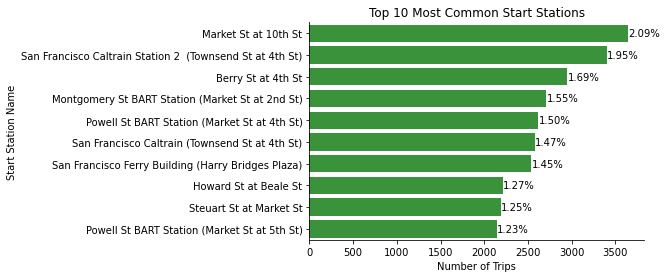

In [42]:
# Color palette 
base_color = sns.color_palette()[2]

# Plot barh chart.  
sns.countplot(data=gobike, y='start_station_name', color=base_color, 
              order=gobike['start_station_name'].value_counts().iloc[:10].index)

# Remove right and top spines
sns.despine()

# Total number of rows from the dataset
total = gobike.shape[0]

# use a loop to print each station's relative frequency on the chart
for i in range(10):
    count = start_sta[i]
    pct_string = '{:0.2f}%'.format(100*count/total)
    plt.text(count+1, i, pct_string, va='center')
    
# include axis labels and title
plt.ylabel('Start Station Name')
plt.xlabel('Number of Trips')
plt.title('Top 10 Most Common Start Stations');

In [43]:
# Summing up the values of the top 10 starting station. 
top10_total = 0 

for i in range(10): 
    count = start_sta[i] 
    pct = 100 * count/total
    top10_total += pct 

print("\n", f"The top 10 most used starting starting account for {top10_total:.1f}% of the {start_sta.count()} total stations.")
      


 The top 10 most used starting starting account for 15.4% of the 329 total stations.


##### Visualization: 

> * From our visalization we can observe that the top 10 most used starting station account 15.4% of the total 329 stations. By proportion 3 % for all starting station account for 15.4% of all activities. 


#### Univariate `#2` 

##### Question: 

> * What is the top 10 most used end station? 

##### Visualization:

In [44]:
# Get the end station count. 
end_sta = gobike.end_station_name.value_counts()

end_sta_index = end_sta.index

print(end_sta_index)

Index(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 4th St)', 'Berry St at 4th St',
       'The Embarcadero at Sansome St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)',
       ...
       'Backesto Park (Jackson St at 13th St)',
       'Foothill Blvd at Harrington Ave', 'Leavenworth St at Broadway',
       'Taylor St at 9th St', 'Farnam St at Fruitvale Ave',
       'Parker Ave at McAllister St', 'Palm St at Willow St', '16th St Depot',
       'Willow St at Vine St', '21st Ave at International Blvd'],
      dtype='object', length=329)


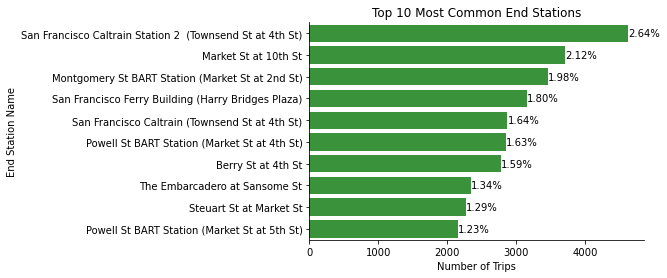

In [45]:
# Color palette 
base_color = sns.color_palette()[2]

# Plot barh chart.  
sns.countplot(data=gobike, y='end_station_name', color=base_color, 
              order=gobike['end_station_name'].value_counts().iloc[:10].index)

# Remove right and top spines
sns.despine()

# Total number of rows from the dataset
total = gobike.shape[0]

# use a loop to print each station's relative frequency on the chart
for i in range(10):
    count = end_sta[i]
    pct_string = '{:0.2f}%'.format(100*count/total)
    plt.text(count+1, i, pct_string, va='center')
    
# include axis labels and title
plt.ylabel('End Station Name')
plt.xlabel('Number of Trips')
plt.title('Top 10 Most Common End Stations');

In [46]:
# Summing up the values of the top 10 end station. 
top10_total = 0 

for i in range(10): 
    count = end_sta[i] 
    pct = 100 * count/total
    top10_total += pct 

print("\n", f"The top 10 most used starting starting account for {top10_total:.1f}% of the {end_sta.count()} total stations.")
    


 The top 10 most used starting starting account for 17.3% of the 329 total stations.


##### Observation: 
> * Unlike our previous findings on starting starting station, there seems to be a higher percetage of stations account for gobike user end distination, showing that the top 10 station account for 17.3% of all station activites.

#### Univariate `#3` 

##### Question: 

> * **what is the distribution of gender?**

##### Visualization: 


In [47]:
# Gender values counts
gen_count = gobike.member_gender.value_counts()


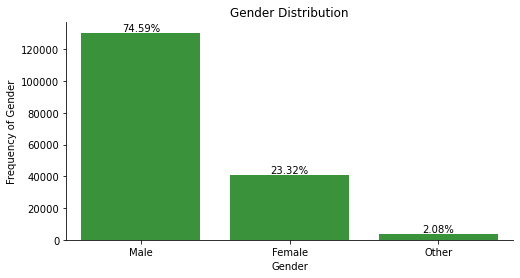

In [48]:
# Color palette 
base_color = sns.color_palette()[2]

# Plot size 
plt.figure(figsize = [8, 4])

# Plot barh chart.  
sns.countplot(data=gobike, x='member_gender', color=base_color, 
              order=gen_count.index)

# Remove right and top spines
sns.despine()

# Total number of rows from the dataset
total = gobike.shape[0]

# use a loop to print each station's relative frequency on the chart
for i in range(len(gen_count)):
    count = gen_count[i]
    pct_string = '{:0.2f}%'.format(100*count/total)
    plt.text(i, count+1, pct_string,va= 'bottom', ha='center')
    
# include axis labels and title
plt.ylabel('Frequency of Gender')
plt.xlabel('Gender')
plt.title('Gender Distribution');

##### Observation: 

> * Of the 174952 trip Male users account for 3 out of every 4 users. 

#### Univariate `#4` 

##### Question: 

> * **What is the distripution of User_type?**

##### Visualization: 


In [49]:
# user value count 
user_count = gobike['user_type'].value_counts()

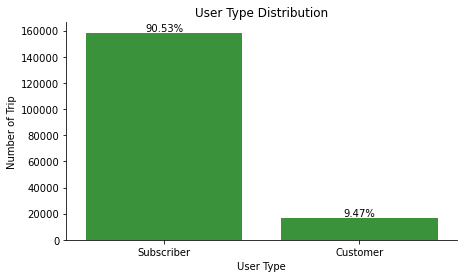

In [50]:
# Color palette 
base_color = sns.color_palette()[2]

# Plot size 
plt.figure(figsize = [7, 4])

# Plot barh chart.  
sns.countplot(data=gobike, x='user_type', color=base_color, 
              order=user_count.index)

# Remove right and top spines
sns.despine()

# Total number of rows from the dataset
total = gobike.shape[0]

# use a loop to print each station's relative frequency on the chart
for i in range(len(user_count)):
    count = user_count[i]
    pct_string = '{:0.2f}%'.format(100*count/total)
    plt.text(i, count+1, pct_string,va= 'bottom', ha='center')
    
# include axis labels and title
plt.ylabel('Number of Trip')
plt.xlabel('User Type')
plt.title('User Type Distribution');

##### Observation: 
> * 9 out of 10 trips were taken by subscribers.
> * This could suggest that most users use the service as one of their main means of transportation.
> * Only 10% of trips were taken by casual customers, those that don't have a subscription plan.


#### Univariate `#5` 

##### Question:

> * **What is the distribution of bike share for all trip program?**

##### Visualization: 

In [51]:
# get the number of regular trips and trips that were part of the program
bike_share = gobike['bike_share_for_all_trip'].value_counts()
bike_share

False    157606
True      17346
Name: bike_share_for_all_trip, dtype: int64

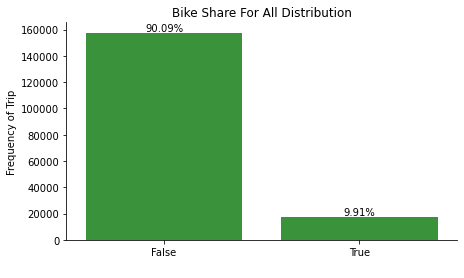

In [52]:
# Color palette 
base_color = sns.color_palette()[2]

# Plot size 
plt.figure(figsize = [7, 4])

# Plot barh chart.  
sns.countplot(data=gobike, x='bike_share_for_all_trip', color=base_color, 
              order=bike_share.index)

# Remove right and top spines
sns.despine()

# Total number of rows from the dataset
total = gobike.shape[0]

# use a loop to print each station's relative frequency on the chart
for i in range(len(bike_share)):
    count = bike_share[i]
    pct_string = '{:0.2f}%'.format(100*count/total)
    plt.text(i, count+1, pct_string,va= 'bottom', ha='center')
    
# include axis labels and title
plt.ylabel('Frequency of Trip')
plt.xlabel(' ')
plt.title('Bike Share For All Distribution');

##### Observation: 

> * From the bar chart, we can observe that 9 out of 10 user aren't enrolled with the discount program.

#### Univariate `#6` 

##### Question: 

> * **What is the distribution of trip base on the day of trip**

##### Visualization: 

In [53]:
# Getting the count for each day. 
day_count = gobike['week_day'].value_counts() 
day_count

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: week_day, dtype: int64

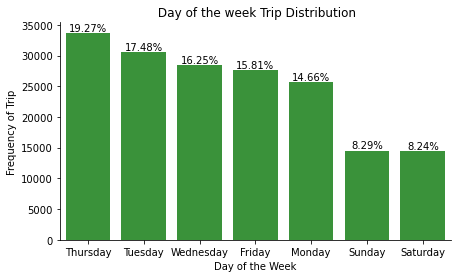

In [54]:
# Color palette 
base_color = sns.color_palette()[2]

# Plot size 
plt.figure(figsize = [7, 4])

# Plot barh chart.  
sns.countplot(data=gobike, x='week_day', color=base_color, 
              order=day_count.index)

# Remove right and top spines
sns.despine()

# Total number of rows from the dataset
total = gobike.shape[0]

# use a loop to print each station's relative frequency on the chart
for i in range(len(day_count)):
    count = day_count[i]
    pct_string = '{:0.2f}%'.format(100*count/total)
    plt.text(i, count+1, pct_string, va= 'bottom', ha='center')
    
# include axis labels and title
plt.ylabel('Frequency of Trip')
plt.xlabel('Day of the Week')
plt.title(' Day of the week Trip Distribution');

##### Observation: 

> * Approximately 20% of the trip for the week are consentrated on Thursday, followed by Tuesdays with 17.48, and this continues with a steady decline till monday. 
>
> * Saturday and Sunday seems to have the least activities with just 8.24% and 8.29% respectivily. This follows pre-existing believes, because people then to move less during weekend. 
>
> * Of all the work day trip Monday seems to have the lowest trip with just 14.66%, this was unexpected as we assumed that monday being the busiest day of week should have more trip counts. 

#### Univariate `#7`: 

##### Question:  

> * **What is the distribution of Hours?**

##### Visualization: 


In [55]:
# Get column stata
gobike['hours'].describe()

count     174952
unique        24
top           17
freq       20904
Name: hours, dtype: int64

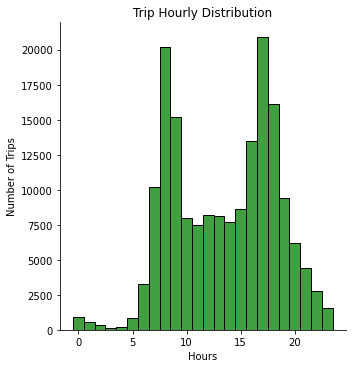

In [56]:
# set bins taking into consideration the variable's distribution
bins = np.arange(0, 1+0.5, 0.5)

# plot histogram using the bins we set above
sns.displot(gobike['hours'], bins=bins, color= 'g')

# set axes labels and chart title
plt.ylabel('Number of Trips')
plt.xlabel('Hours')
plt.title('Trip Hourly Distribution');

> Their seems to be pattern in the data let use a line chart for a better visualization.

In [57]:
# get the number of trips per hour
hour_freq = gobike['hours'].value_counts()
hour_freq

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: hours, dtype: int64

In [58]:
# get the indexes of the peak hours
# this will be useful when rawing the vertical line
# in the x-axis below to draw attention to peak times: 17:00 and 8:00
hour_sorted = hour_freq.index
hour_sorted

CategoricalIndex([17,  8, 18,  9, 16,  7, 19, 15, 12, 13, 10, 14, 11, 20, 21,
                   6, 22, 23,  0,  5,  1,  2,  4,  3],
                 categories=[0, 1, 2, 3, 4, 5, 6, 7, ...], ordered=True, dtype='category')

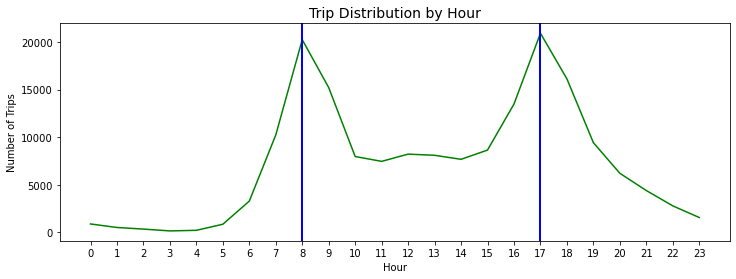

In [59]:
# plot line chart of the hourly distribution of trips
plt.figure(figsize=[12,4])
sns.lineplot(x=hour_freq.keys(), y=hour_freq,color = 'g')
plt.xticks(range(0,24))
plt.axvline(x=hour_sorted[0], color='b', linewidth=2)
plt.axvline(x=hour_sorted[1], color='b', linewidth=2)
plt.ylabel('Number of Trips')
plt.xlabel('Hour')
plt.title('Trip Distribution by Hour', fontsize=14);

##### Observation: 
> * During peak times, the number of trips increase significantly. In order to emphasize this trend, I included two vertical lines on the two peaks: one at 8 a.m., and another at 5 p.m. (17:00).
> * Interestingly, from 10am to 3pm, the number of trips taken are more or less the same.
> * The earlier hours have the least amount of trips

### Quatitative Feature: Univariate

#### Univariate `#8` : **What is the Distribution Duration (in minute) ?**

##### Visualization: 


In [60]:
# see how the trips are distributed
gobike['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

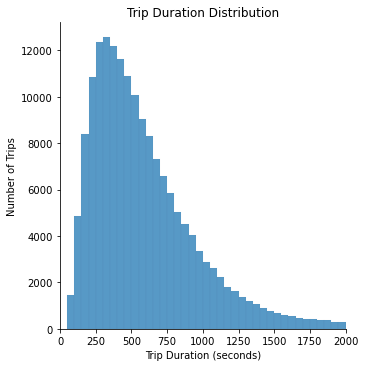

In [61]:
# set bins taking into consideration the variable's distribution
bins = np.arange(0, gobike['duration_sec'].max()+50, 50)

# plot histogram using the bins we set above
sns.displot(gobike['duration_sec'], bins=bins)

# trim x-axis to remove outliers and facilitate analysis
plt.xlim([0, 2e3])

# set axes labels and chart title
plt.ylabel('Number of Trips')
plt.xlabel('Trip Duration (seconds)')
plt.title('Trip Duration Distribution');

> For a better visualization it is best we apply log as the long tail suggest a distribution that is shewed. 

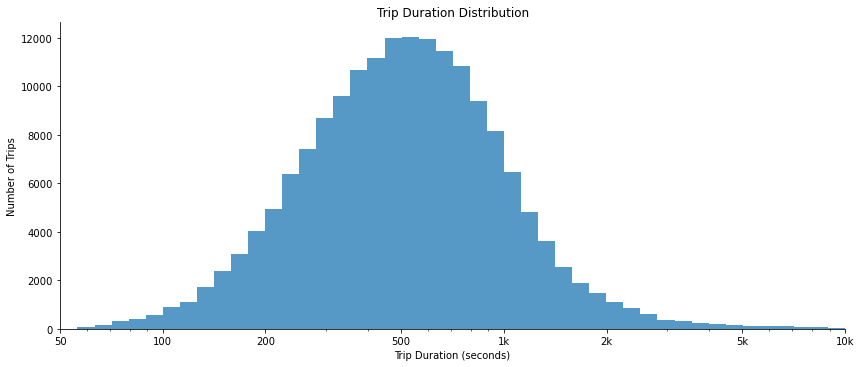

In [62]:
# set new bins
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)

# plot chart
sns.displot(gobike['duration_sec'], bins=bins)

# use log scale in the x-axis
plt.xscale('log')

# set the xticks and xtick labels

plt.xticks([0, 50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4], [0, 50, 100, 200, 500, '1k', '2k', '5k', '10k'])

# crop x-axis to remove outliers
plt.xlim((50, 1e4))

# axis labels
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of Trips')

# increase figure size
plt.gcf().set_size_inches(14,5)

# set title
plt.title('Trip Duration Distribution');

##### Observation: 

> * From the histogram above we can say that most of the trip duration takes between 4 to 15 minutes. 
> * Using a log to tranfore the column result in a normal distribution. 

#### Univariate `#9`: **What is the Distribution of Age?** 

##### Visualization: 

In [63]:
# Checking the distribution user age. 
gobike['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

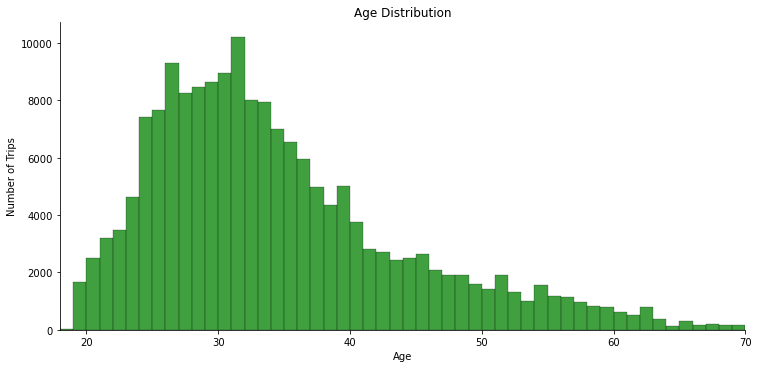

In [64]:
# set bins taking into account birth year distribution
bins = np.arange(18, gobike['age'].max()+1, 1)

# plot histogram using the bins
sns.displot(data=gobike, x='age', color='g', bins=bins)

# remove right and top spines
sns.despine()

# limit x-axis to make interpretation easier
plt.xlim(18,70)

# axes labels and title
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.title('Age Distribution')

# increase chart size
plt.gcf().set_size_inches(12,5);

##### Observation: 

> * From the graph above we can observed that most of our user are between the age brake of 20 to 40. 
> * Age is plays a significant role in whether to a user will pick a bike or not, this is because the old we 
get the weaker we are to ride a bike. 
> * There seems to be an error in one of the data in which a user is 141 year of age, this can either be a 
typo error or the person is an outlier(I know that this a typo but i just wanted to entertain the idea that someone 
lived till 141). 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
   From our visualization we saw that most of the trip durtion (in seconds) were between 240 and 900 seconds, this insight was got when we plotted a histogram of the duration column and we discoverted that the data were stew to the right, to correct this we applyed a log function on our data we finally got a normal distribution. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
   During the course of plotting our distribution one of the features that struck my interest the most were the week_day feature, this was as a result of how the data were distributed between the days of the week as i expect the number of trip 
should be at it highest on mondy and steadly decline to Sunday, but the distrubution showed us that Thursday, followed by Tuesday has the highest number of trips. 

At the begin of plotting our feature distribution we discovered that some of the distribution we were interested in don't have a data to work with, so we did some feature engineering on the available data. Example of such data were the week_day, age, and hours columns this was as a result of needing to check how each variable is distributed espacially how many trip took place on a particular day or hour of the week. 

## Bivariate Exploration
For this section of the data exploration we will be looking at the following ralationship between variours data:

1. What is the Relationship between Starting Hours and user age?
2. How does Age affect the trip duations? 
4. How does gender affect tip duration?
5. How does user type and trip duration related to each other? 

#### Bivariate `#10`: How does Age affect the trip duations? 

#### Visualization: 

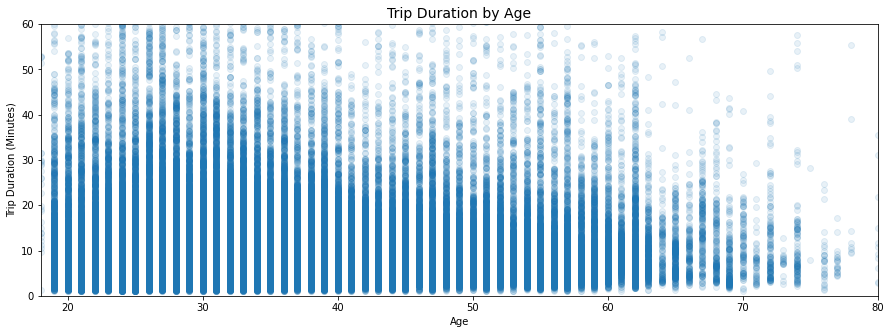

In [65]:
# plot a scatter plot considering user age and trip duration(in minute)

# Figure Size.
plt.figure(figsize=[15,5])

# Plotting Scatter plot.
plt.scatter(data=gobike, x='age', y='duration_min', alpha=1/10)

# setting axis limite.
plt.xlim([18, 80])
plt.ylim([0, 60])

# Plat annotation.
plt.ylabel('Trip Duration (Minutes)')
plt.xlabel('Age')
plt.title('Trip Duration by Age', fontsize=14);

#### Observation: 

* This scatter plot shows a negative ralationship between the age of our users and the trip duraion 

* This implies that user who are in their early 20s and to late 30s use our service more. 

* The older the user the less time they user our services.

#### Bivariate `#11`: What is the Relationship between Starting Hours and user age? 

#### Visualization:

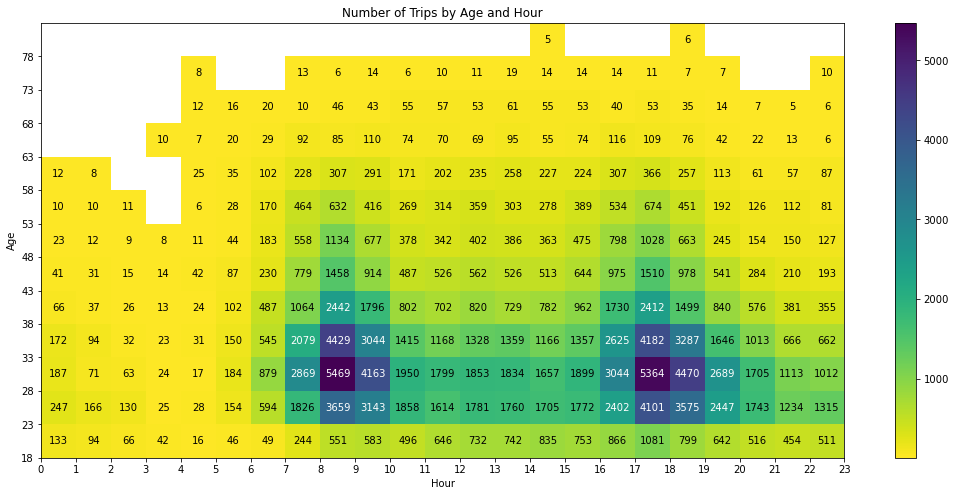

In [66]:
# Bin size.
bins_x = np.arange(0, gobike['hours'].max()+1, 1)
bins_y = np.arange(18, 80+5, 5)

# Plotting a 2d histogram
plt.figure(figsize=[18,8])
h2d = plt.hist2d(data=gobike, x='hours', y='age', cmin=5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xticks(range(0,24));
plt.yticks(range(18,80+1,5))
plt.ylabel('Age')
plt.xlabel('Hour')
plt.title('Number of Trips by Age and Hour')


# loop to print the counts for each block
counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c >= 2e3:
            plt.text(bins_x[i]+0.5, bins_y[j]+2.5, int(c),
                    ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+2.5, int(c),
                      ha='center', va='center', color='black');

#### Observation: 
* From the heat map above, we can see most trips were taken by people in their 20s to 40s. The peaks at 8am and 5pm are also observable.
* At the very early hours of the day, we can also see trips from younger people, which might indicate they use the bikes after a night out as well.

####  Bivariate `#12`: How does gender affect trip duration ?

#### Visualization: 

In [67]:
# check the distribution of duration grouped by gender
gobike.groupby(['member_gender'])['duration_min'].describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Male,130500.0,11.206581,25.079909,1.016667,5.183333,8.216667,12.683333,1409.133333
Female,40805.0,12.981213,29.783394,1.016667,6.016667,9.450000,14.400000,1386.583333
Other,3647.0,16.622141,58.770767,1.050000,5.733333,9.266667,14.575000,1375.200000


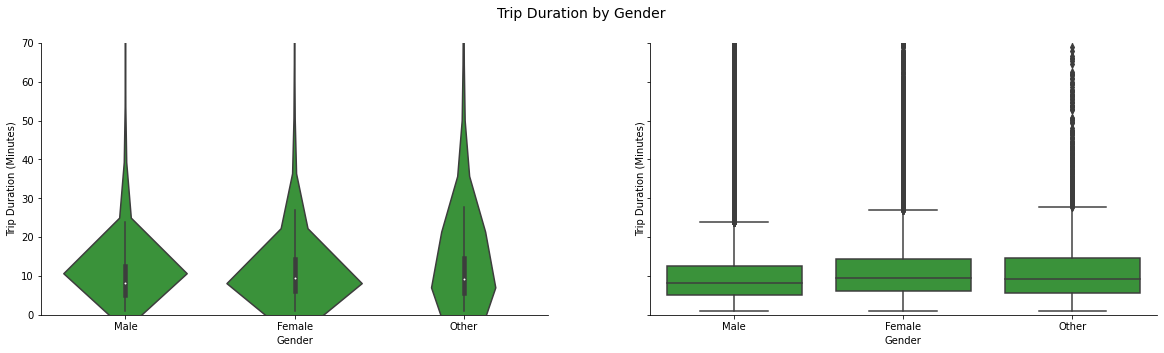

In [68]:
# I'll try creating a violin plot and a box plot, side-by-side
# using gender and trip duration

fig, axes = plt.subplots(1, 2, figsize=[20,5], sharey=True)

# Remove Frame
sns.despine()

# plot 1: violin 
sns.violinplot(ax=axes[0], data=gobike, x='member_gender', y='duration_min', color=base_color)
axes[0].set_ylim([0, 70])
axes[0].set_ylabel('Trip Duration (Minutes)')
axes[0].set_xlabel('Gender')

# plot 2: box plot
sns.boxplot(data=gobike, x='member_gender', y='duration_min', color=base_color)
axes[1].set_ylabel('Trip Duration (Minutes)')
axes[1].set_xlabel('Gender')

# overall title
plt.suptitle('Trip Duration by Gender', fontsize=14);

#### Observation:

* The trip duration for non-binary users is more evenly distributed than males and females. Female and male trips tend to be around 10 minutes or so.
* When looking at trips that take from 1500 seconds (25 minutes) to 2000 seconds (35 minutes), however, these are more common among females than males.
* It's worth noting that these nuances were better noticed in the violin plot than the box plot, in this case.

####  Bivariate `#13`:How does user type and trip duration related to each other? 

#### Visualization:

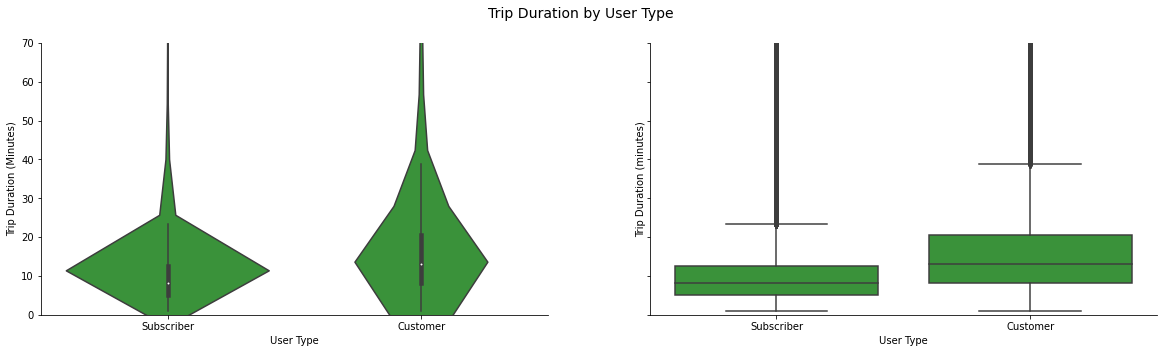

In [69]:
# I'll repeat the approach of plotting a violin and a box plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=[20,5], sharey=True)

# Remove Frame
sns.despine()

# plot 1: violin 
sns.violinplot(ax=axes[0], data=gobike, x='user_type', y='duration_min', color=base_color)
axes[0].set_ylim([0, 70])
axes[0].set_xlabel('User Type')
axes[0].set_ylabel('Trip Duration (Minutes)')

# plot 2: box plot
sns.boxplot(data=gobike, x='user_type', y='duration_min', color=base_color)
axes[1].set_ylim([0, 70])
axes[1].set_xlabel('User Type')
axes[1].set_ylabel('Trip Duration (minutes)')

# overall title
plt.suptitle('Trip Duration by User Type', fontsize=14);

#### Observation: 

* Customers tend to take longer trips than subscribers.
* This might be because of the more casual nature of their trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
In this section, I tried plotting some variables against my faeature of interest, trip duration. When I used Age and trip duration, I observe that there is a negative relation between age and trips trip duration, as a result the older a user is the the shorter the trip duration. 


After plotting the age and trip duration using scatter plot we observe that there is a nagetive relationship between the age and trip duration, then we plot a heatmap on the relationship between starting hours and age. we can see most trips were taken by people in their 20s to 40s. The peaks at 8am and 5pm are also observable.

At this point, I moved on to investigate my main feature of interest, trip duration, against categorical variables. First, I did a violin plot and a box plot of the relationship between trip duration and gender. Once I did that, I noticed the trip duration for non-binary users is more evenly distributed than males and females. Female and male trips tend to be around 10 minutes or so. Also, longer trips that take from 25 to 35 minutes are more common among females than males. These nuances were better noticed in the violin plot than the box plot, in this instance.

Finally, I did a similar approach for trip duration and user type. From the chart, we can clearly see that customers tend to take longer trips than subscribers. A possible explanation might be the more casual nature of their trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I plotted a heat map to investigate te relationship between age and start hour of trips. The plot shows what we've established before, both the fact that most trips were taken by people in their 20s to 40s, also that the peaks are at 8am and 5pm. What was interesting was that at the very early hours of the day (before sunrise), we can also see trips from younger people, which might indicate they use the bikes after a night out as well.

## Multivariate Exploration

In [70]:
# get a subset of our sample to reduce overplotting
gobike_subset = gobike.sample(200)
gobike_subset

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,week_day,hours,age
5106,277,2019-02-28 14:04:17.612,2019-02-28 14:08:54.824,216.0,San Pablo Ave at 27th St,218.0,DeFremery Park,6033,Subscriber,1991,Male,False,4.616667,Thursday,14,28
38276,1547,2019-02-23 12:02:42.509,2019-02-23 12:28:29.992,119.0,18th St at Noe St,74.0,Laguna St at Hayes St,6493,Customer,1989,Male,False,25.783333,Saturday,12,30
28457,361,2019-02-25 08:41:43.151,2019-02-25 08:47:44.881,28.0,The Embarcadero at Bryant St,81.0,Berry St at 4th St,6505,Subscriber,1971,Male,False,6.016667,Monday,8,48
3721,515,2019-02-28 16:59:22.811,2019-02-28 17:07:58.092,67.0,San Francisco Caltrain Station 2 (Townsend St...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,4962,Subscriber,1984,Male,False,8.583333,Thursday,16,35
3492,739,2019-02-28 17:08:20.300,2019-02-28 17:20:40.120,20.0,Mechanics Monument Plaza (Market St at Bush St),87.0,Folsom St at 13th St,5951,Subscriber,1990,Male,False,12.316667,Thursday,17,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156894,314,2019-02-06 07:10:41.180,2019-02-06 07:15:55.260,15.0,San Francisco Ferry Building (Harry Bridges Pl...,13.0,Commercial St at Montgomery St,3589,Subscriber,1972,Male,False,5.233333,Wednesday,7,47
99487,112,2019-02-14 19:57:49.970,2019-02-14 19:59:42.809,77.0,11th St at Natoma St,77.0,11th St at Natoma St,6579,Subscriber,1991,Male,False,1.866667,Thursday,19,28
181764,381,2019-02-01 08:55:54.587,2019-02-01 09:02:16.116,44.0,Civic Center/UN Plaza BART Station (Market St ...,78.0,Folsom St at 9th St,4889,Subscriber,1991,Male,False,6.350000,Friday,8,28
128991,689,2019-02-10 11:45:50.004,2019-02-10 11:57:19.235,73.0,Pierce St at Haight St,70.0,Central Ave at Fell St,5496,Subscriber,1999,Male,False,11.483333,Sunday,11,20


#### Multivariate `#15`:  What is the  Ralationship between Age, Trip Duration (minutes),and Gender.

#### Visualisation: 

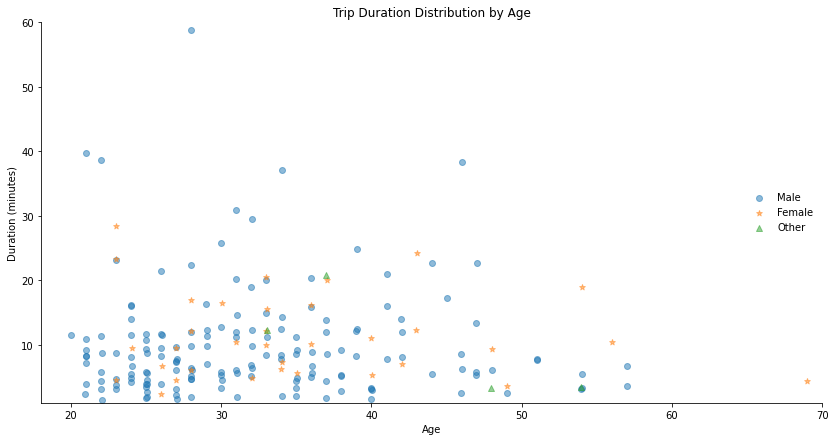

In [71]:
# create a scatter plot with age on the x-axis,
# trip duration on the y-axis,
# with different markers for gender

# set markers for each gender
ttype_makers = [['Male', 'o'],
                ['Female', '*'],
                ['Other', '^']]

# loop through the data to assign the chosen marker to each one
for ttype, marker in ttype_makers:
    plot_data = gobike_subset.loc[gobike_subset['member_gender'] == ttype]
    sns.regplot(data=plot_data, x='age', y='duration_min', x_jitter=0.04, 
                fit_reg=False, marker=marker, scatter_kws={'alpha': 1/2})

# remove top and right spines
sns.despine()

# set legend
plt.legend(['Male', 'Female', 'Other'], loc=7, frameon=False)

# limit both axis considering their individual distributions
plt.xlim([18,70])
plt.ylim([1,60])

# axes labels and title
plt.ylabel('Duration (minutes)')
plt.xlabel('Age')
plt.title('Trip Duration Distribution by Age')

# increase figure size
plt.gcf().set_size_inches(14,7);

#### Observation: 

* Take note from our provious observation we can see that there still exist a negative relationship between age and trip duration. 

* This also inform us that the trip tend to be between 4 to 15 trip. 

* One new finding from the analysis is that there seems to be a more female taking longer trip than male. 

#### Multivariate `#16`: What is the Ralationship between Age, Trip Duration (minutes), and user_type? 

#### Visualization: 

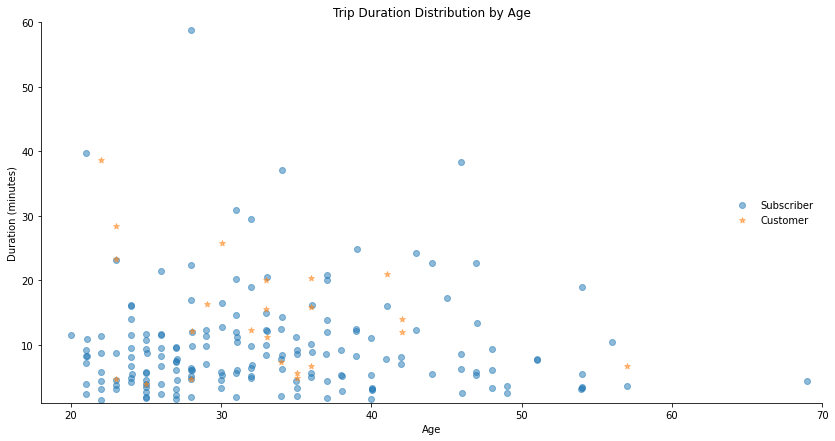

In [72]:
# create a scatter plot with age on the x-axis,
# trip duration on the y-axis,
# with different markers for type of user

# set markers for each user type
ttype_makers = [['Subscriber', 'o'],
                ['Customer', '*']]

# loop through the data to assign the chosen marker to each one
for ttype, marker in ttype_makers:
    plot_data = gobike_subset.loc[gobike_subset['user_type'] == ttype]
    sns.regplot(data=plot_data, x='age', y='duration_min', x_jitter=0.04, 
                fit_reg=False, marker=marker, scatter_kws={'alpha': 1/2})

# remove top and right spines
sns.despine()

# set legend
plt.legend(['Subscriber', 'Customer'], loc=7, frameon=False)

# limit both axis considering their individual distributions
plt.xlim([18,70])
plt.ylim([1,60])

# axes labels and title
plt.ylabel('Duration (minutes)')
plt.xlabel('Age')
plt.title('Trip Duration Distribution by Age')

# increase figure size
plt.gcf().set_size_inches(14,7);

#### Observation: 

* from the plot abover we can see that mostly older people tend to be a subscriber than causer customer.
* We can also observe that most casual customer are between 25 to 40.

#### Multivariate `#17`: What is the Ralationship between Gender, Trip Duration (minutes), and user_type?

#### Visualization: 

In [73]:
# Find the mean trip duration grouped by user type and gender
# This will help see if I plotted the charts below correctly
gobike.groupby(['user_type', 'member_gender'])['duration_min'].mean()

user_type   member_gender
Subscriber  Male             10.271101
            Female           11.607134
            Other            15.202909
Customer    Male             20.893225
            Female           23.735468
            Other            26.705000
Name: duration_min, dtype: float64

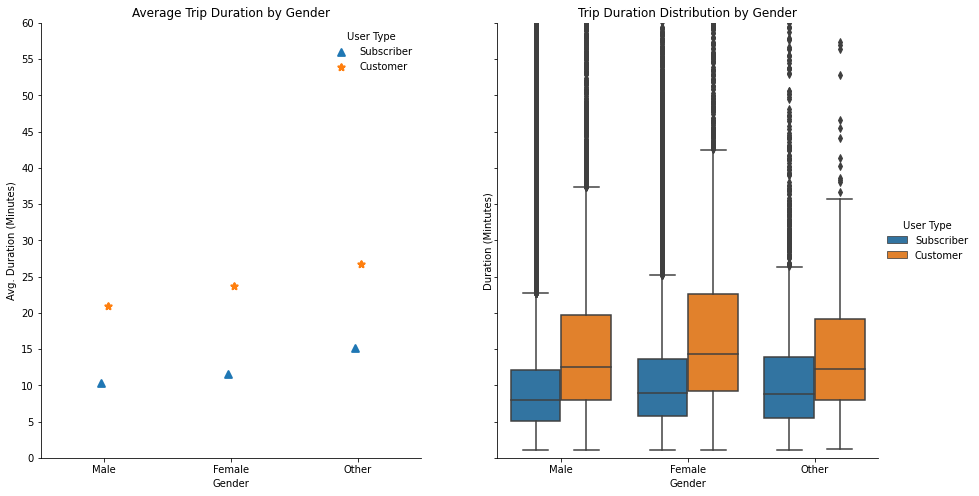

In [74]:
# Plot the data using three variables:
# Gender on the x-axis,
# Mean trip duration on the y-axis and,
# User Type a color encoding (hue)

fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# plot 1: point plot
sns.pointplot(ax=axes[0], data=gobike, x='member_gender', y='duration_min', hue='user_type',
             dodge=True, linestyles="", ci=None, markers=["^", "*"])
sns.despine()
axes[0].set_yticks(np.arange(0, 60+5, 5))
axes[0].legend(title='User Type', frameon=False, loc=1)
axes[0].set_ylabel('Avg. Duration (Minutes)')
axes[0].set_xlabel('Gender')
axes[0].set_title('Average Trip Duration by Gender');

# plot 2: box plot
sns.boxplot(ax=axes[1], data=gobike, x='member_gender', y='duration_min', hue='user_type')
axes[1].set_ylim([0, 60])
axes[1].set_ylabel('Duration (Mintutes)')
axes[1].set_xlabel('Gender');
axes[1].legend(title='User Type', frameon=False, loc=6, bbox_to_anchor=(1.0, 0.5))
axes[1].set_title('Trip Duration Distribution by Gender');

#### Observation: '
* From the point plot, we can see that customers have longer average trips than subscribers, for every gender. Also, for non-binary individuals, the average trip is slightly longer for both user type groups, when compared to males and females. When compared to men, women take slightly longer trips as well.
* From the box plot, we can see that the distributions for subscribers has less variability than customers', for every gender.
* Originally, I added a lineplot too, but the lines might infer that there is an order from one gender to the other, which could be misleading to readers. So, I commented out the visualization and presented only the point plot and the box plot.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Firstly, we analysis the relationship between the age, gender, and trip duration and this inform us that there is a negative relationship between the age and trip duration, with female customer having a higher trip duration than others. 

Next we looked at the relationship between age, user type, and trip duration, and like our previous finding on the relationship between trip duration and age the same still hold true with this plot, but when we look at the user type we discovered that most of the highest trip duration were from causal customers not suscribers. 

Lastly, i plotted a graph showing the relationship between gender, user type, and trip duration, this showed us that among gender and user type user who don't have a gender identity  have higher trip duraton and same go for both subscribers and casual customers.

### Were there any interesting or surprising interactions between features?
The most surprising relationship i discovered during this section of my analysis was the relationship between the rate of age, user type, and trip duration, in which we saw that casual users have a higher trip duraion than subscribers. This was surprising because we expect that for an individual to subscripe for our service this user must be someone that users our service regularly and longer, but our data doesn't agree with this premise instead causal customers have a higher trip duration than subscribers. 

## Conclusions
 Our Objective on performing explorative data analysis on our data was to find out how different variables/features interact with our main feature of interest which is trip duration, from showing distribution of individual features, to showing the relationship between 2 or more feature. 
 
 Before we moved to data exploration we performed some ***preliminary data wrangling***, in this section we clean our data by correcting different data format, removing none values, and dropping columns that aren't useful for our analysis. 
 
 ***Univariate Graph Findings***
 
 * We plotted the top 10 most used staring and ending station, we found out that 15 to 17 percent of trip activities are from only 3% of the stations. 
 * The trip duraion histogram showed us that most of the trip were between 5 to 15 minutes. 
 * At the begininge of our exploration we performed some feature egineering on our starting time, of this we exacted the hour a trip started and ended. from the extraction we plotted a histogram and found out that most of users use our service around 8am in morning and 5pm in the evening, 
 * Also we exacted the day of the week in which each trip was held and found out that most of our trip were on Thursdays, followed by Tuesday, with monday coming last for work days, Saturdays and Sundays had the least activities of the 7 days.
 
 
 ***Bivariate Graph Findings*** 
 
 
 * Plotting a scatter plot of age and trip duration shows a negative relationship between trip duration and age, implying that the older a user is the less time usering our service. 
 * Using a heatmap i was able to observe the relationship between age and starting hours, and this informed us that individuals within the age of 20 to 40 were use our servise in the monring around 8 and in the evening around 5. 
 * Plotting a box plot using the relationship between the trip duration and user type showed us that casual customers have higher trip duration than subscribers.
 * I use a violin plot to understand the relationship between the trip duration and gender, this showed on that on average other gender type have a more distributed duration time than the other genders. 
 
 
 ***Multivariate Graph Findings*** 
 
 
 * When comparing the relationship between age, trip duration and gender, female tend to have a higher trip duration time than others. 
 * Examing the relationship between age, trip duration, and user type used us that on avarage causal customers have a higher trip duratin than sebscribers and most of our old users like to use our subscription service more than causal customers. 
 *  I did a scatter plot of age vs. trip duration, with different markers for user type. In this chart, it was interesting to see that older people apparently prefer to be a subscriber instead of customer, but this warrants further investigation.